# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | yerofey pavlovich
Processing Record 6 of Set 1 | mancio lima
Processing Record 7 of Set 1 | rumoi
Processing Record 8 of Set 1 | murghob
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mao
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | remire-montjoly
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | ijuw
City not found. Skipping...
Processing Record 16 of Set 1 | balabac
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | greymouth
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lata,40.1629,-8.3327,21.38,84,100,4.03,PT,1728236169
1,coquimbo,-29.9533,-71.3436,14.85,77,100,0.00,CL,1728236169
2,wailua homesteads,22.0669,-159.3780,25.44,73,75,6.17,US,1728236169
3,edinburgh of the seven seas,-37.0676,-12.3116,14.44,89,91,8.69,SH,1728236169
4,yerofey pavlovich,53.9667,121.9667,-0.79,75,84,1.50,RU,1728236169
...,...,...,...,...,...,...,...,...,...
565,alice springs,-23.7000,133.8833,16.75,42,67,2.06,AU,1728236276
566,pontes e lacerda,-15.2261,-59.3353,38.84,23,32,5.94,BR,1728236276
567,forest,37.3638,-79.2897,23.43,67,75,2.06,US,1728236270
568,nueva gerona,21.8833,-82.8000,31.48,61,80,3.44,CU,1728236277


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../Output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lata,40.1629,-8.3327,21.38,84,100,4.03,PT,1728236169
1,coquimbo,-29.9533,-71.3436,14.85,77,100,0.00,CL,1728236169
2,wailua homesteads,22.0669,-159.3780,25.44,73,75,6.17,US,1728236169
3,edinburgh of the seven seas,-37.0676,-12.3116,14.44,89,91,8.69,SH,1728236169
4,yerofey pavlovich,53.9667,121.9667,-0.79,75,84,1.50,RU,1728236169


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

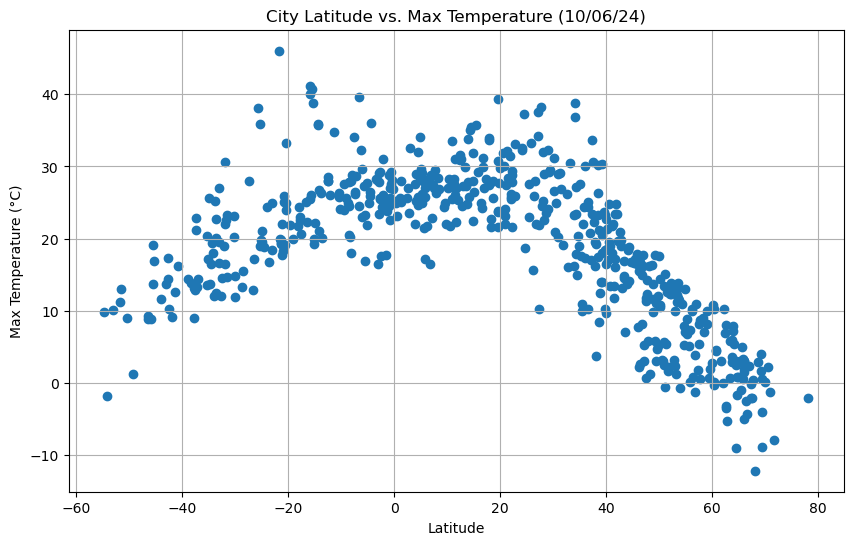

In [22]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], label="Cities")

# Incorporate the other graph properties, Use current date
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))  
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_data/Figure_1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

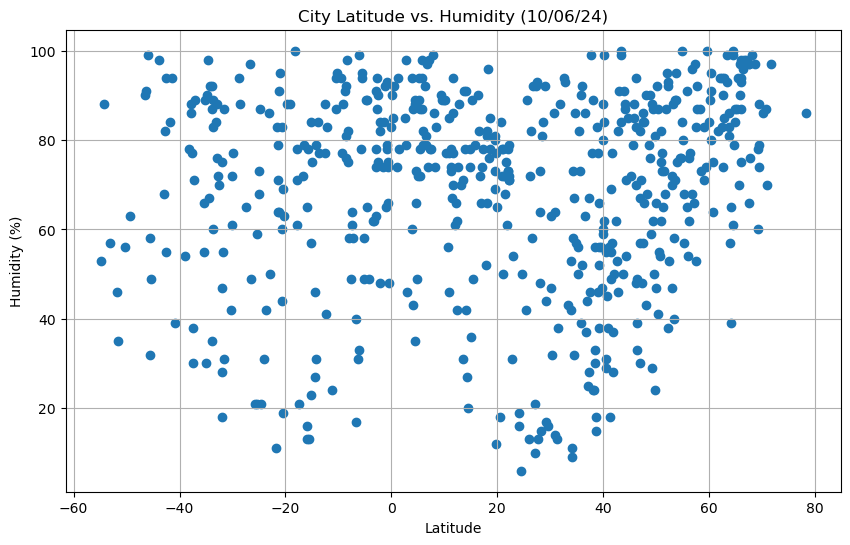

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], label="Cities")

# Incorporate the other graph properties, Use current date
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))  
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Figure_2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

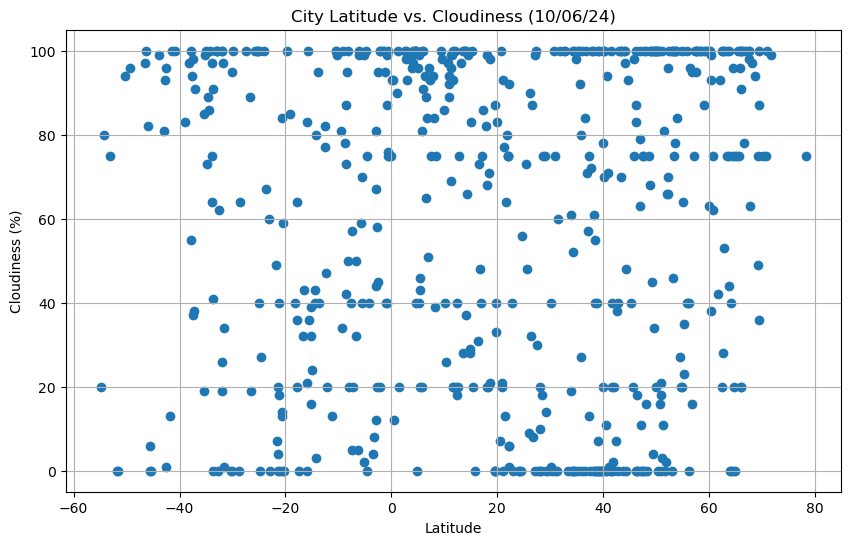

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], label="Cities")

# Incorporate the other graph properties, Use current date
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Figure_3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

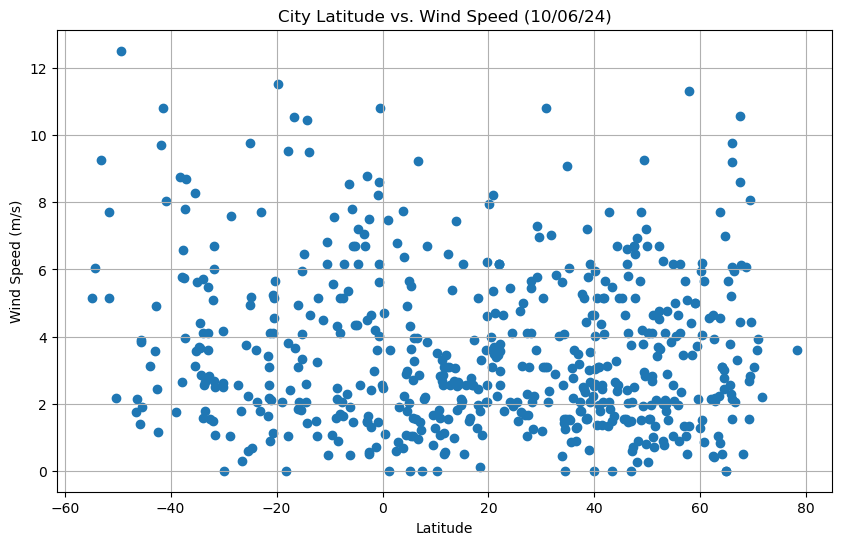

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], label="Cities")

# Incorporate the other graph properties, Use current date
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Figure_4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
y="Max Temperature"

In [79]:
# Define a function to create Linear Regression plots

def plot_reg(x_values, y_values, title, filename):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=0.5, alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y)
   
    #plt.annotate
    plt.text(min(x_values),max(y_values),line_eq,fontsize=12, color='red')

    print(f"The r-value is: {r_value}")

    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lata,40.1629,-8.3327,21.38,84,100,4.03,PT,1728236169
2,wailua homesteads,22.0669,-159.3780,25.44,73,75,6.17,US,1728236169
4,yerofey pavlovich,53.9667,121.9667,-0.79,75,84,1.50,RU,1728236169
6,rumoi,43.9344,141.6428,13.67,91,100,2.63,JP,1728236170
7,murghob,38.1702,73.9667,3.66,24,61,2.35,TJ,1728236170


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,coquimbo,-29.9533,-71.3436,14.85,77,100,0.00,CL,1728236169
3,edinburgh of the seven seas,-37.0676,-12.3116,14.44,89,91,8.69,SH,1728236169
5,mancio lima,-7.6142,-72.8958,34.04,49,40,2.06,BR,1728236170
8,afaahiti,-17.7500,-149.2833,22.55,71,36,9.54,PF,1728236170
9,ushuaia,-54.8000,-68.3000,9.81,53,20,5.14,AR,1728236016


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8424833054914134


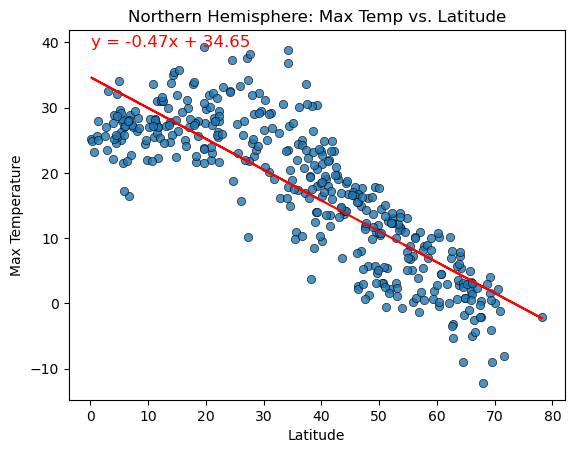

In [82]:
# Linear regression on Northern Hemisphere
plot_reg(northern_df["Lat"], northern_df["Max Temp"], 
                       "Northern Hemisphere: Max Temp vs. Latitude", "../Output_data/Nothern_temp_vs_lat.png")

The r-value is: 0.6603068671218162


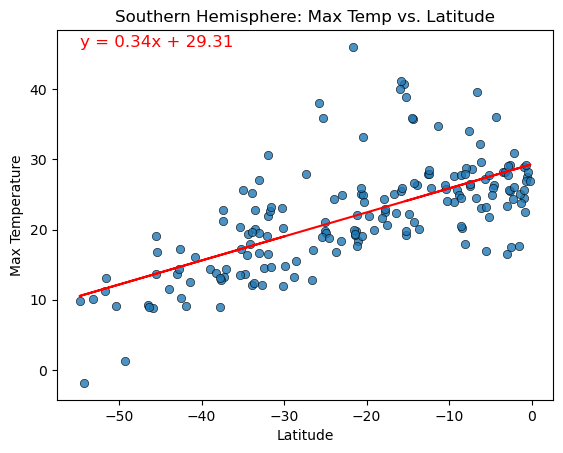

In [83]:
# Linear regression on Southern Hemisphere
plot_reg(southern_df["Lat"], southern_df["Max Temp"], 
                       "Southern Hemisphere: Max Temp vs. Latitude", "../Output_data/Southern_temp_vs_lat.png")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a gradual positive relationship between latitude and temperature. Which makes sense because as you approach the north pole the temperature gets colder. 

In the Southern Hemisphere, there is a gradual negative relationship latitude and temperature. Which also makes sense because as you approach south pole the temperature gets colder. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10757897271698487


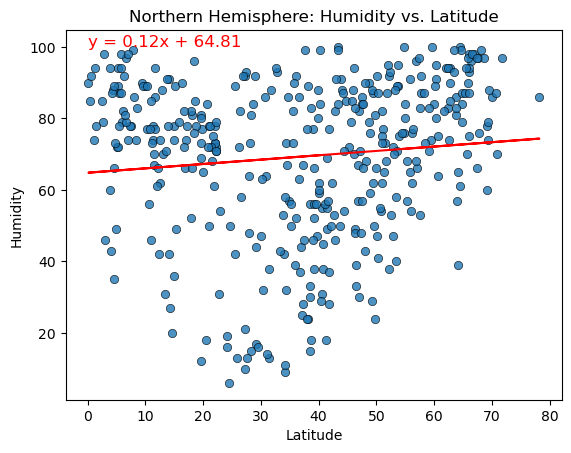

In [85]:
# Northern Hemisphere
y="Humidity"
plot_reg(northern_df["Lat"], northern_df["Humidity"],
                       "Northern Hemisphere: Humidity vs. Latitude", "../Output_data/Northern_humidity_vs_Lat.png")


The r-value is: 0.07337770238241513


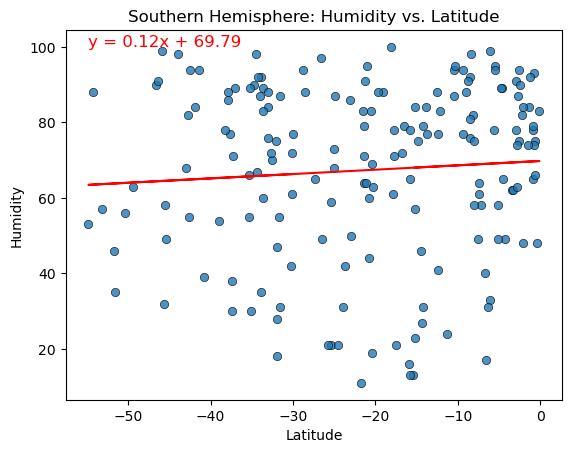

In [86]:
# Southern Hemisphere
plot_reg(southern_df["Lat"], southern_df["Humidity"], 
                       "Southern Hemisphere: Humidity vs. Latitude", "../output_data/Southern_humidity_vs_lat.png")

**Discussion about the linear relationship:** 

The small R value in both of these linear regressions suggests that there is no statistically significant trend between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.022365412132541552


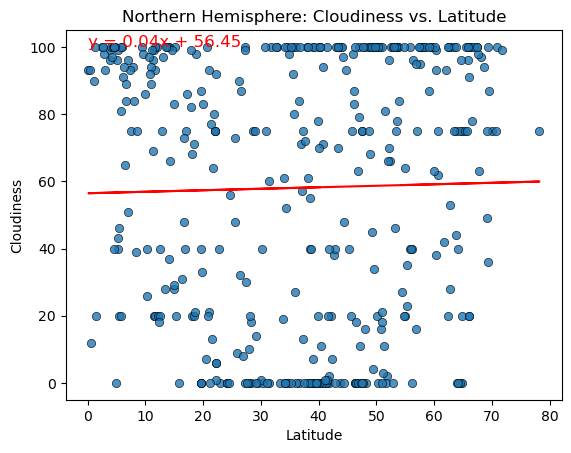

In [87]:
# Northern Hemisphere
y="Cloudiness"
plot_reg(northern_df["Lat"], northern_df["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude", "../Output_data/Northern_cloudy_vs_lat.png")

The r-value is: -0.03999705138041542


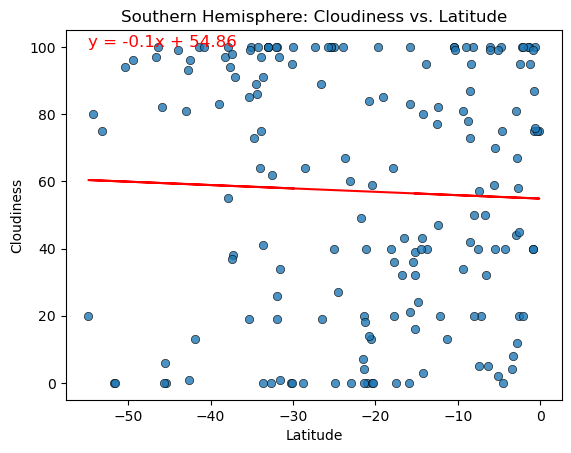

In [88]:
# Southern Hemisphere
plot_reg(southern_df["Lat"], southern_df["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness vs. Latitude", "../Output_data/Southern_cloudy_vs_lat.png")

**Discussion about the linear relationship:** The very small R value in both of these linear regressions suggests that there is no statistically significant trend between Cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11650893129922922


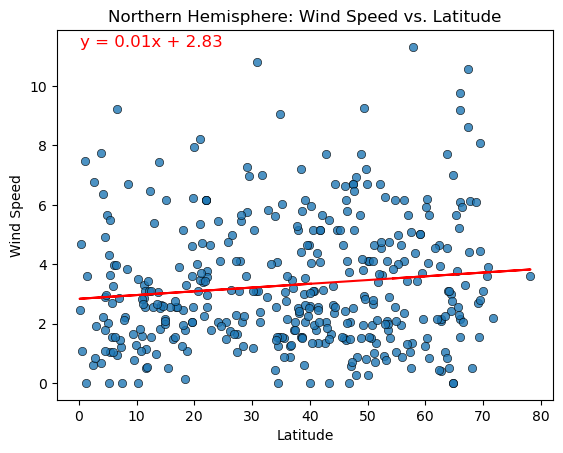

In [89]:
# Northern Hemisphere
y="Wind Speed"
plot_reg(northern_df["Lat"], northern_df["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude", "../Output_data/Northern_wind_vs_lat.png")

The r-value is: -0.062316189597536445


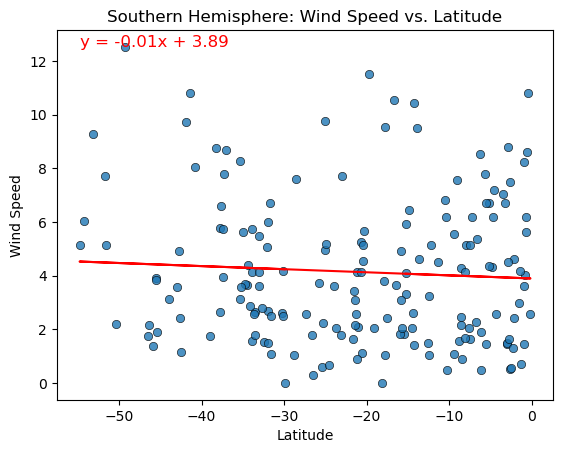

In [90]:
# Southern Hemisphere
plot_reg(southern_df["Lat"], southern_df["Wind Speed"], 
                       "Southern Hemisphere: Wind Speed vs. Latitude", "../Output_data/Southern_wind_vs_lat.png")

**Discussion about the linear relationship:** The small R value in both of these linear regressions suggests that there is no statistically significant trend between Cloudiness and latitude. Maybe these trends have more to do with proximity to oceans rather than latitude